In [3]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from datetime import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
print(y_train.shape)

(60000, 10)


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty):
  fig = plt.figure( facecolor='y', edgecolor='k')
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.legend()
  plt.grid()
  plt.show()

#Model 1: CNN with 3 ConvNets and 3X3 Kernel size.

In [8]:
convnet3=Sequential() # Initializing the model

# First ConvNet
convnet3.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
convnet3.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
convnet3.add(Dropout(0.25))
convnet3.add(Conv2D(128,kernel_size=(3,3), activation='relu'))

#maxpooling by (2,2 ) ,dropout,flattening
convnet3.add(MaxPooling2D(pool_size=(2,2)))
convnet3.add(Dropout(0.25))
convnet3.add(Flatten())

#hidden_layer
convnet3.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
convnet3.add(Dropout(0.5))
convnet3.add(Dense(num_classes,activation='softmax'))
print(convnet3.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)  

##Model Compilation

In [9]:
start=datetime.now()
convnet3.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
convnet3_history=convnet3.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
print("Time taken to run this cell :", datetime.now() - start)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 515s 9ms/step - loss: 0.1783 - acc: 0.9450 - val_loss: 0.0405 - val_acc: 0.9862
Epoch 2/12
60000/60000 [==============================] - 512s 9ms/step - loss: 0.0608 - acc: 0.9814 - val_loss: 0.0347 - val_acc: 0.9892
Epoch 3/12
60000/60000 [==============================] - 513s 9ms/step - loss: 0.0471 - acc: 0.9855 - val_loss: 0.0285 - val_acc: 0.9905
Epoch 4/12
60000/60000 [==============================] - 515s 9ms/step - loss: 0.0358 - acc: 0.9889 - val_loss: 0.0276 - val_acc: 0.9903
Epoch 5/12
60000/60000 [==============================] - 516s 9ms/step - loss: 0.0314 - acc: 0.9904 - val_loss: 0.0272 - val_acc: 0.9904
Epoch 6/12
60000/60000 [==============================] - 514s 9ms/step - loss: 0.0266 - acc: 0.9912 - val_loss: 0.0243 - val_acc: 0.9928
Epoch 7/12
60000/60000 [==============================] - 513s 9ms/step - 

##Model Evaluation

test score : 0.023814157019101594
test sccuracy : 0.9933


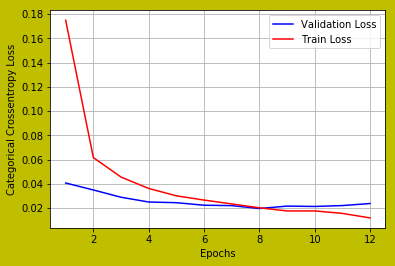

In [0]:
score=convnet3.evaluate(x_test,y_test,verbose=0)
test_score3=score[0]
test_accuracy3=score[1]
train_accuracy3=max(convnet3_history.history['acc'])
print('test score :',test_score3)
print('test sccuracy :',test_accuracy3)
# error plot
x=list(range(1,epochs+1))
vy=convnet3_history.history['val_loss'] #validation loss
ty=convnet3_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

#Model 2: CNN with 5 ConvNets and 5X5 Kernel size.

In [0]:
convnet5=Sequential() # Initializing the model

# First ConvNet
convnet5.add(Conv2D(32,kernel_size=(5,5), activation='relu', padding='same', input_shape=input_shape))

#Second ConvNet
convnet5.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

#Third ConvNet
convnet5.add(Conv2D(96,kernel_size=(5,5),padding='same',activation='relu'))
#maxpooling by (2,2 ) ,dropout,flattening
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

#Fourth ConvNet
convnet5.add(Conv2D(128,kernel_size=(5,5), padding='same', activation='relu'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

#fifth Convnet
convnet5.add(Conv2D(164,kernel_size=(5,5), padding='same', activation='relu'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Flatten())

#hidden_layer
convnet5.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
convnet5.add(BatchNormalization())
convnet5.add(Dropout(0.5))
convnet5.add(Dense(num_classes,activation='softmax'))
print(convnet5.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 96)        153696    
_________________________________________________________________
max_pooling2d_2 (MaxP

##Model Compilation

In [0]:
start = datetime.now()
convnet5.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
convnet5_history=convnet5.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
print("Time taken to run this cell :", datetime.now() - start)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 843s 14ms/step - loss: 2.4664 - acc: 0.1728 - val_loss: 2.6763 - val_acc: 0.1114
Epoch 2/12
60000/60000 [==============================] - 840s 14ms/step - loss: 1.9119 - acc: 0.2926 - val_loss: 1.3380 - val_acc: 0.5081
Epoch 3/12
60000/60000 [==============================] - 817s 14ms/step - loss: 1.1535 - acc: 0.5858 - val_loss: 0.8421 - val_acc: 0.7205
Epoch 4/12
60000/60000 [==============================] - 803s 13ms/step - loss: 0.6639 - acc: 0.7837 - val_loss: 0.3669 - val_acc: 0.8843
Epoch 5/12
60000/60000 [==============================] - 811s 14ms/step - loss: 0.4424 - acc: 0.8605 - val_loss: 0.2923 - val_acc: 0.9056
Epoch 6/12
60000/60000 [==============================] - 785s 13ms/step - loss: 0.3275 - acc: 0.8986 - val_loss: 0.1812 - val_acc: 0.9409
Epoch 7/12
60000/60000 [==============================] - 772s 13ms/

##Model Evaluation

test score : 0.048168362715619154
test Accuracy : 0.986


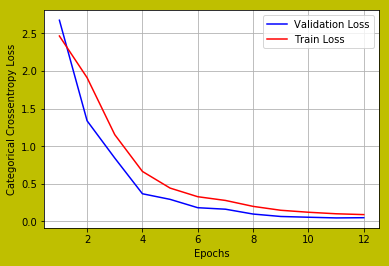

In [0]:
score=convnet5.evaluate(x_test,y_test,verbose=0)
test_score5=score[0]
test_accuracy5=score[1]
train_accuracy5=max(convnet5_history.history['acc'])
print('test score :',test_score5)
print('test Accuracy :',test_accuracy5)
# error plot
x=list(range(1,epochs+1))
vy=convnet5_history.history['val_loss'] #validation loss
ty=convnet5_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

#Model 3: CNN with 7 ConvNets and2X2 Kernel size.


In [0]:
convnet7=Sequential() # Initializing the model

# First ConvNet
convnet7.add(Conv2D(16,kernel_size=(2,2), activation='relu', padding='same', input_shape=input_shape))

#Second Convnet
convnet7.add(Conv2D(32,kernel_size=(2,2), padding='same',strides=(2,2), activation='relu'))
#convnet7.add(MaxPooling2D(pool_size=(2,2)))
#convnet7.add(Dropout(0.25))

# 3rd ConvNet
convnet7.add(Conv2D(64,kernel_size=(2,2), padding='same', activation='relu'))  
#maxpooling by (2,2 ) ,dropout,flattening
#convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.15))

#fourth Convnet
convnet7.add(Conv2D(96,kernel_size=(2,2), padding='same', activation='relu'))
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.39))

#fifth Convnet
convnet7.add(Conv2D(128,kernel_size=(2,2), padding='same', activation='relu'))
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.3))

#sixth Convnet
convnet7.add(Conv2D(164,kernel_size=(2,2), padding='same', activation='relu'))

#seventh Convnet
convnet7.add(Conv2D(164,kernel_size=(2,2), padding='same', activation='relu'))

convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.4))
convnet7.add(Flatten())

#hidden_layer
convnet7.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))#1 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(148, activation='relu', kernel_initializer=he_normal(seed=None)))#2 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))#3 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(num_classes,activation='softmax'))
print(convnet7.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 96)        24672     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 96)          0         
__________

##Model compilation

In [0]:
start=datetime.now()
convnet7.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
convnet7_history=convnet7.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
print("Time taken to run this cell :", datetime.now() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 142s 2ms/step - loss: 1.8961 - acc: 0.3754 - val_loss: 1.5272 - val_acc: 0.4652
Epoch 2/12
60000/60000 [==============================] - 145s 2ms/step - loss: 0.4249 - acc: 0.8774 - val_loss: 0.0784 - val_acc: 0.9765
Epoch 3/12
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1882 - acc: 0.9518 - val_loss: 0.0854 - val_acc: 0.9789
Epoch 4/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1409 - acc: 0.9645 - val_loss: 0.0484 - val_acc: 0.9870
Epoch 5/12
60000/60000 [==============================] - 130s 2ms/step - loss: 0.1121 - acc: 0.9717 - val_loss: 0.0372 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0965 - acc: 0.9760 - val_loss: 0.0347 - val_acc: 0.9915
Epoch 7/12
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0887 - acc: 0.9779 - val_loss: 0.0382 - 

##Model Evaluation

test score : 0.03093639321749797
test Accuracy : 0.9911


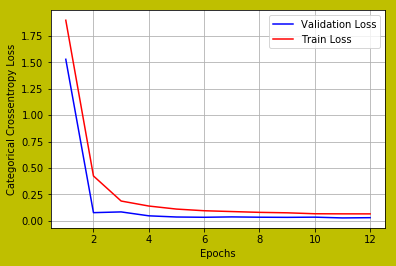

In [0]:
score=convnet7.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(convnet7_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=convnet7_history.history['val_loss'] #validation loss
ty=convnet7_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

In [11]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Training Accuracy", "Test Accuracy", "Time Taken"]
x.add_row(["3ConvNet with kernel 3x3 ",0.9961, 0.9933, "1:42"])
x.add_row(["5ConvNet with kernel 5x5",0.9730, 0.9860, "2:39"])
x.add_row(["7ConvNet with kernel 2x2", 0.9833, 0.9911, "0:28"])
print(x)

+---------------------------+-------------------+---------------+------------+
|           Model           | Training Accuracy | Test Accuracy | Time Taken |
+---------------------------+-------------------+---------------+------------+
| 3ConvNet with kernel 3x3  |       0.9961      |     0.9933    |    1:42    |
|  5ConvNet with kernel 5x5 |       0.973       |     0.986     |    2:39    |
|  7ConvNet with kernel 2x2 |       0.9833      |     0.9911    |    0:28    |
+---------------------------+-------------------+---------------+------------+
